In [1]:
#pip install pydot

In [2]:
#pip install pydot graphviz

In [3]:
#pip install tensorflow

In [4]:
#pip install pydot

In [5]:
#pip install distutils

In [6]:
#pip install setuptools

In [7]:
#pip install keras

In [8]:
#pip install plotly

In [9]:
# Data Handling
import numpy as np
import pandas as pd
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

import os

#Image Package
from PIL import Image

# Randomizer
import random

# Importing TensorFlow
import tensorflow as tf

In [10]:
# keras
from keras.models import Sequential, Model                   # Neural network model as a sequence of layers.
from keras.layers import Input
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.layers import Rescaling, RandomFlip, RandomRotation
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models


In [11]:
# Data Visualization
import plotly.subplots as sp
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [12]:
from concurrent.futures import ThreadPoolExecutor

In [13]:
# Resize the input images
def imageResizer(paths):
  with ThreadPoolExecutor() as executor:
    resizedImages = list(executor.map(lambda x: Image.open(x). resize((350,250)), paths))
  return resizedImages

# Plot a matrix of images in a list
def plotImagesList(images, title, subtitle):
  fig = sp.make_subplots(rows = 3, cols = 3)
  images = imageResizer(images)

  traces = []
  for i in range(min(9, len(images))):
    img = go.Image(z = images[i])
    traces.append((img, i//3+1, i%3+1))

  fig.add_traces([trace[0] for trace in traces],
                rows = [trace[1] for trace in traces],
                cols = [trace[2] for trace in traces])

  fig.update_layout(
      title = {'text': f'<b>{title}<br> <i><sub>{subtitle}</sub></i></b>',
               'font': dict(size = 22)},
      height =800,
      width = 800,
      margin = dict(t = 110, l = 80)
  )


In [14]:
# Loading training, testing, and validation directories

trainDirectory = r"C:\Studies\6th sem\INFOSYS\dataset\archive\Train\Train"
testDirectory = r"C:\Studies\6th sem\INFOSYS\dataset\archive\Test\Test"
valDirectory= r"C:\Studies\6th sem\INFOSYS\dataset\archive\Validation\Validation"

In [15]:
# Directory names

directories = {
    trainDirectory: 'Train',
    testDirectory: 'Test',
    valDirectory: 'Validation'
    }

# Naming subfolders
subfolders = ['Healthy', 'Powdery', 'Rust']

print('\n* * * * * Number of files in each folder * * * * *\n')

# Counting the total of pictures inside each subfolder and directory
for dir, name in directories.items():
    total = 0
    for sub in subfolders:
        path = os.path.join(dir, sub)
        num_files = len([f for f in os.listdir(path) if os.path.join(path, f)])
        total += num_files
        print(f'\n{name}/{sub}: {num_files}')
    print(f'\n  Total: {total}')
    print("-" * 80)


* * * * * Number of files in each folder * * * * *


Train/Healthy: 458

Train/Powdery: 430

Train/Rust: 434

  Total: 1322
--------------------------------------------------------------------------------

Test/Healthy: 50

Test/Powdery: 50

Test/Rust: 50

  Total: 150
--------------------------------------------------------------------------------

Validation/Healthy: 20

Validation/Powdery: 20

Validation/Rust: 20

  Total: 60
--------------------------------------------------------------------------------


In [16]:
uniqueDimensions = set()

for directory, name in directories.items():
  for subfolder in subfolders:
    folderPath = os.path.join(directory, subfolder)

    for file in os.listdir(folderPath):
      imagePath = os.path.join(folderPath, file)
      with Image.open(imagePath) as img:
        uniqueDimensions.add(img.size)

if len(uniqueDimensions) == 1:
    print(f"\nAll images have the same dimensions: {uniqueDimensions.pop()}")
else:
    print(f"\nFound {len(uniqueDimensions)} unique image dimensions: {uniqueDimensions}")



Found 8 unique image dimensions: {(4032, 3024), (4000, 2672), (4000, 3000), (5184, 3456), (2592, 1728), (3901, 2607), (4608, 3456), (2421, 2279)}


In [17]:
dimensionCounts = defaultdict(int)

for directory, name in directories.items():
  for subfolder in subfolders:
    folderPath = os.path.join(directory, subfolder)

    for file in os.listdir(folderPath):
            imagePath = os.path.join(folderPath, file)
            with Image.open(imagePath) as img:
              dimensionCounts[img.size] += 1

for dimension, count in dimensionCounts.items():
  print(f"\nDimension {dimension}: {count} images")


Dimension (4000, 3000): 88 images

Dimension (4000, 2672): 1130 images

Dimension (2421, 2279): 1 images

Dimension (2592, 1728): 127 images

Dimension (5184, 3456): 97 images

Dimension (4608, 3456): 72 images

Dimension (4032, 3024): 16 images

Dimension (3901, 2607): 1 images


In [18]:
# Datatype of images

all_uint8 = True
all_in_range = True

for directory, name in directories.items():
  for subfolder in subfolders:
    folderPath = os.path.join(directory, subfolder)

    for file in os.listdir(folderPath):
            imagePath = os.path.join(folderPath, file)
            with Image.open(imagePath) as img:
              img_array = np.array(img)

            if img_array.dtype == 'uint8':
              all_uint8 = False

            if img_array.min() < 0 or img_array.max() > 255:
              all_in_range = False

if all_uint8:
  print("All images are of data type uint8\n")
else:
  print("Not all images are of data type uint8\n")

if all_in_range:
    print("All images have pixel values ranging from 0 to 255")
else:
    print("Not all images have the same pixel values from 0 to 255")

Not all images are of data type uint8

All images have pixel values ranging from 0 to 255


In [19]:
# Loading the directory for each class in the training dataset

trainHealthyDirectory = trainDirectory + "/" + 'Healthy'
trainRustDirectory = trainDirectory + "/" + 'Rust'
trainPowderyDirectory = trainDirectory + "/" + 'Powdery'

# Select 10 random pictures from each directory

healthyFiles = random.sample(os.listdir(trainHealthyDirectory), 10)
rustFiles = random.sample(os.listdir(trainRustDirectory), 10)
powderyFiles = random.sample(os.listdir(trainPowderyDirectory), 10)

In [20]:
# Healthy Plants Plotting

healthyImages = [os.path.join(trainHealthyDirectory, files) for files in healthyFiles]
plotImagesList(healthyImages, "Healthy Plants", "Training Dataset")

In [21]:
# Rust Plants Plotting

rustImages = [os.path.join(trainRustDirectory, files) for files in rustFiles]
plotImagesList(rustImages, "Rust Plants", "Training Dataset")

In [22]:
# Powdery Plants Plotting

powderyImages = [os.path.join(trainPowderyDirectory, files) for files in powderyFiles]
plotImagesList(powderyImages, "Powdery Plants", "Training Dataset")

***PREPROCESSING STARTS FROM HERE***

In [23]:
# Dataset for Training Data

train = tf.keras.utils.image_dataset_from_directory(
    trainDirectory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = 42,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 1322 files belonging to 3 classes.


In [24]:
# Dataset for Test Data

test = tf.keras.utils.image_dataset_from_directory(
    testDirectory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = 42,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 150 files belonging to 3 classes.


In [25]:
# Dataset for Validation Data

validation = tf.keras.utils.image_dataset_from_directory(
    valDirectory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Healthy', 'Powdery', 'Rust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = 42,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 60 files belonging to 3 classes.


In [26]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)
print('\nValidation Dataset:', validation)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [27]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for image, label in validation:
  batch_min = tf.reduce_min(img)
  batch_max = tf.reduce_max(img)

  min_value = min(min_value, batch_min.numpy())
  max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0

Maximum pixel value in the Validation dataset 255


In [28]:
scaler = Rescaling(1./255) #pixel values to 0 - 1


In [29]:
# Rescaling

train = train.map(lambda x, y: (scaler(x), y))
test = test.map(lambda x, y: (scaler(x), y))
validation = validation.map(lambda x, y: (scaler(x), y))

In [30]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for image, label in validation:
  batch_min = tf.reduce_min(img)
  batch_max = tf.reduce_max(img)

  min_value = min(min_value, batch_min.numpy())
  max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0

Maximum pixel value in the Validation dataset 255


***Data Augmentation Starts Here***



In [31]:
# Data Augmentation pipeline

augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
            factor = (-.25, .3),
            fill_mode = 'reflect',
            interpolation = 'bilinear',
            seed = 42
        ),

        tf.keras.layers.RandomBrightness(
            factor = (-.45, .45),
            value_range = (0.0, 1.0),
            seed = 42
        ),
        tf.keras.layers.RandomContrast(
            factor = (.5),
            seed = 42
        )
    ]
)

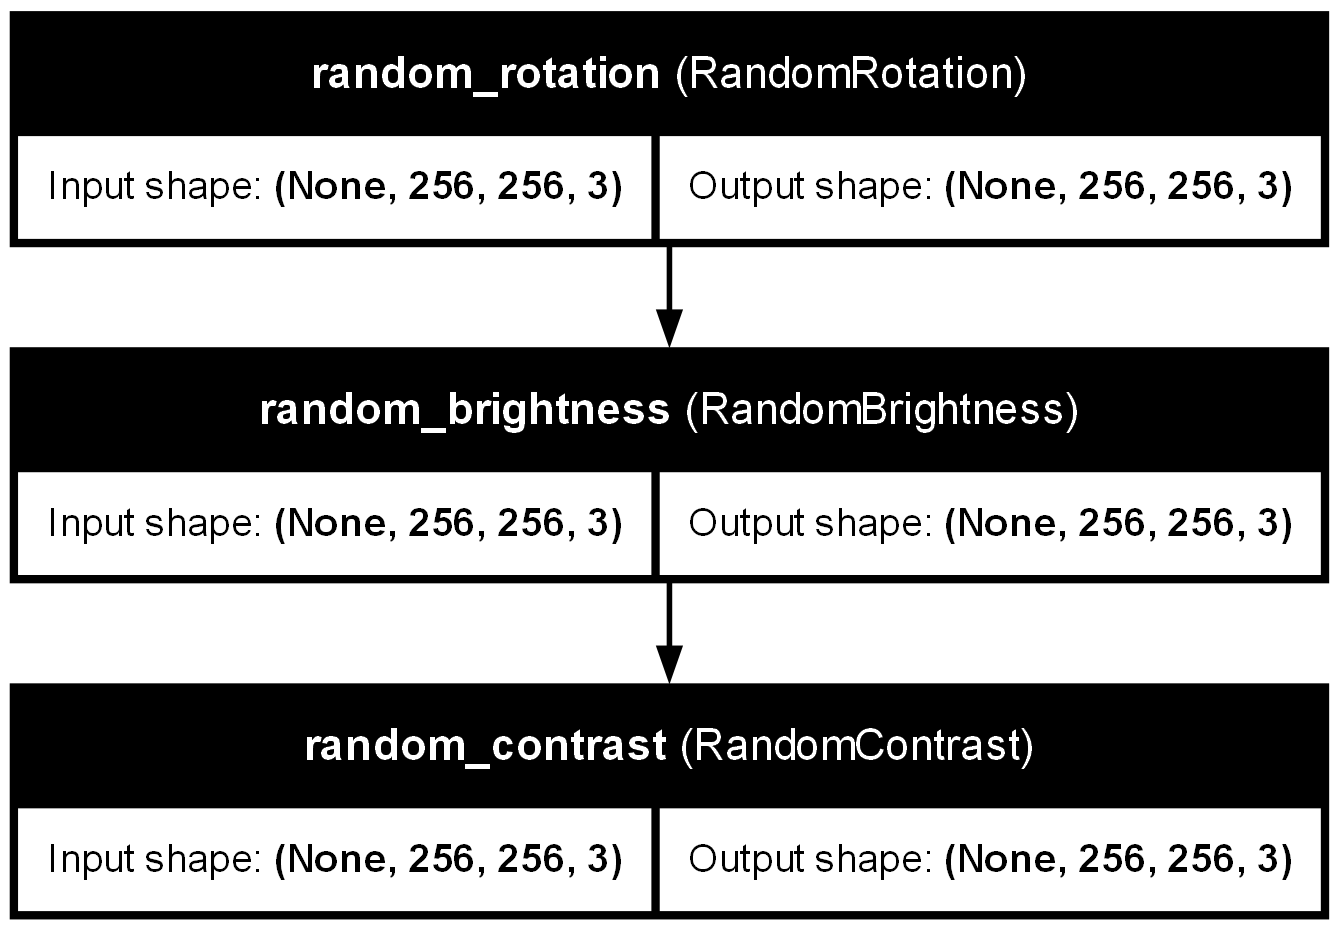

In [32]:
augmentation.build((None, 256, 256, 3)) #Model Build

#Plot Model

tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True)

***CNN STARTS FROM HERE***

In [33]:
input = Input(shape = (256, 256, 3)) #input layer

augmented_inputs = augmentation(input)

scaled_inputs = Rescaling(1./255)(augmented_inputs)


#layers
x = Conv2D(32, (3, 3), strides = 1, padding = 'same')(scaled_inputs)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (5, 5), padding = 'same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), padding = 'same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Dropout(0.3)(x)

x = Conv2D(256, (5, 5), padding = 'same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Dropout(0.3)(x)

x = Conv2D(512, (3, 3), padding = 'same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Dropout(0.3)(x)

# Flattening
x = Flatten()(x)

# Fully Connected Layers
x = Dense(3, activation = 'softmax')(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Output
output = Dense(3, activation = 'softmax')(x)

# Model
model = Model(inputs = input, outputs = output)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             

 Total params: 2,227,919 (8.50 MB)

 Trainable params: 2,225,935 (8.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [34]:
#earlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 5,
                               restore_best_weights = True)

checkpoint = ModelCheckpoint('best_model.keras',
                            monitor = 'val_accuracy',
                            save_best_only = True)

In [35]:
# Training and Testing Model
try:
    history = model.fit(
        train, epochs = 10,
        validation_data = test,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.3188 - loss: 1.1945 - val_accuracy: 0.3333 - val_loss: 1.1077
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.3354 - loss: 1.1488 - val_accuracy: 0.3333 - val_loss: 1.1048
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.3319 - loss: 1.2817 - val_accuracy: 0.3333 - val_loss: 1.1026
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.3233 - loss: 1.1709 - val_accuracy: 0.3333 - val_loss: 1.1013
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.3316 - loss: 1.1583 - val_accuracy: 0.3333 - val_loss: 1.1009
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.3030 - loss: 1.1561 - val_accuracy: 0.3333 - val_loss: 1.1001
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.3273 - loss: 1.1284 - val_accuracy: 0.3333 - val_loss: 1.1003
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.3300 - loss: 1.1191 - val_accuracy: 0.3333 - v

In [36]:
#pip install nbformat --upgrade


In [37]:
# Creating subplot
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=['<b>Loss Over Epochs</b>', '<b>Accuracy Over Epochs</b>'],
                    horizontal_spacing=0.2)

# Loss over epochs
train_loss = go.Scatter(x=list(range(len(history.history['loss']))),
                        y=history.history['loss'],
                        mode='lines',
                        line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                        name='Training',
                        showlegend = False)

val_loss = go.Scatter(x=list(range(len(history.history['val_loss']))),
                      y=history.history['val_loss'],
                      mode='lines',
                      line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                      name='Test',
                      showlegend = False)


fig.add_trace(train_loss, row=1, col=1)
fig.add_trace(val_loss, row=1, col=1)

# Accuray over epochs
train_acc = go.Scatter(x=list(range(len(history.history['accuracy']))),
                       y=history.history['accuracy'],
                       mode='lines',
                       line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                       name='Training',
                       showlegend = True)

val_acc = go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                     y=history.history['val_accuracy'],
                     mode='lines',
                     line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                     name='Test',
                     showlegend = True)


fig.add_trace(train_acc, row=1, col=2)
fig.add_trace(val_acc, row=1, col=2)

# Updating layout
fig.update_layout(
    title={'text': '<b>Loss and Accuracy Over Epochs</b>', 'x': 0.025, 'xanchor': 'left'},
    margin=dict(t=100),
    plot_bgcolor = '#EEF6FF', paper_bgcolor = '#EEF6FF',
    height=500, width=1000,
    showlegend= True
)

fig.update_yaxes(title_text = 'Loss', row = 1, col = 1)
fig.update_yaxes(title_text = 'Accuracy', row = 1, col = 2)

fig.update_xaxes(title_text = 'Epoch', row = 1, col = 1)
fig.update_xaxes(title_text = 'Epoch', row = 1, col = 2)

# Showing figure
fig.show()

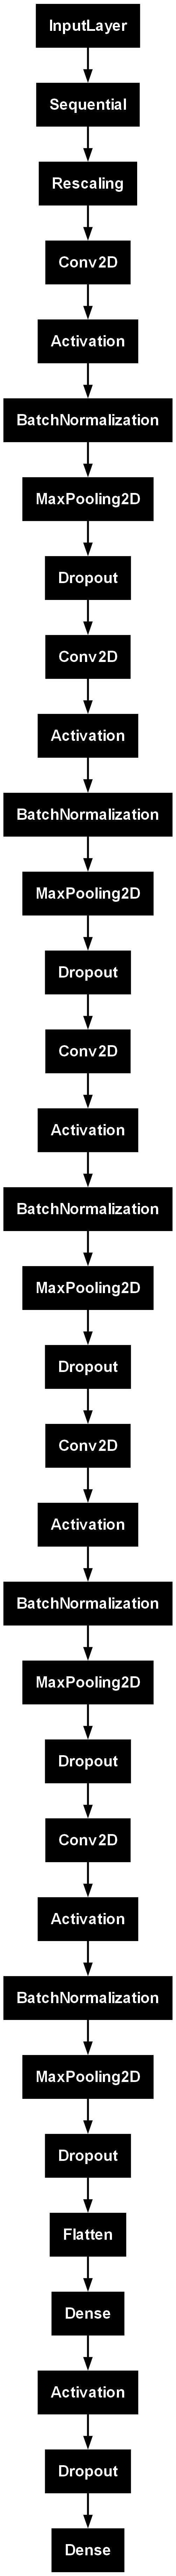

In [38]:
tf.keras.utils.plot_model(model)

In [39]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             

 Total params: 6,679,791 (25.48 MB)

 Trainable params: 2,225,935 (8.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 4,451,872 (16.98 MB)

In [40]:
model.load_weights('best_model.keras')

In [41]:
preds = model.predict(validation)  # Running model on the validation dataset
val_loss, val_acc = model.evaluate(validation) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.2875 - loss: 1.1232

Validation Loss:  1.1076817512512207

Validation Accuracy:  33.0 %


Picture of a Powdery Plant: 



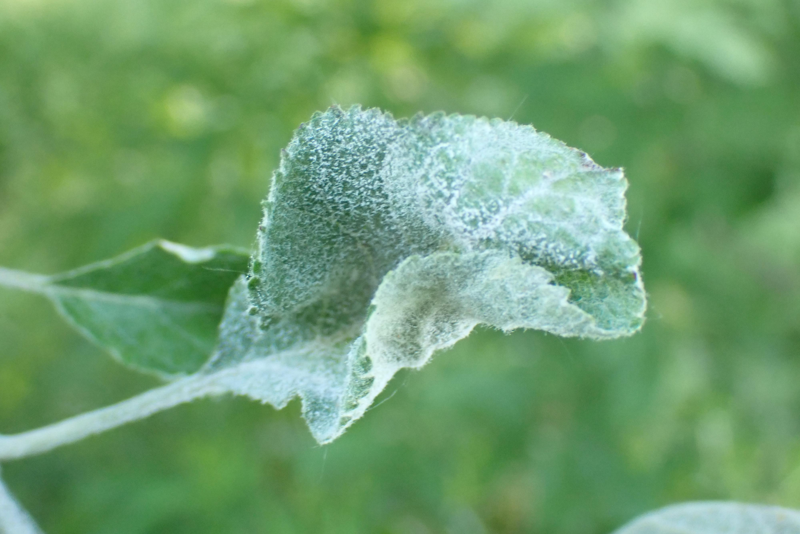

In [42]:
# Loading an image from the Validation/ Powdery directory
image_path = r"C:\Studies\6th sem\INFOSYS\dataset\archive\Validation\Validation\Powdery\9bd06de433b285d8.jpg"
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Powdery Plant: \n')
resized_img

In [43]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = ['Healthy', 'Powdery', 'Rust']

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

Predicted Class: Powdery

Confidence Score: 0.38832607865333557


Picture of a Rust Plant: 



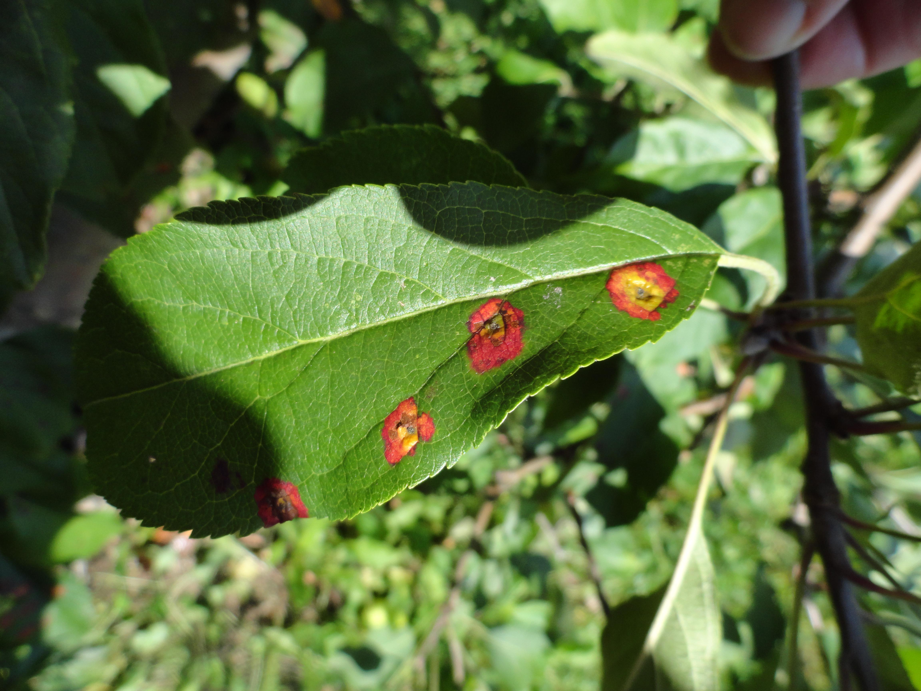

In [44]:
# Loading an image from the Validation/ Rust directory
image_path = r"C:\Studies\6th sem\INFOSYS\dataset\archive\Validation\Validation\Rust\8437f01fd3d20f26.jpg"
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Rust Plant: \n')
resized_img

In [45]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = ['Healthy', 'Powdery', 'Rust']

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Predicted Class: Powdery

Confidence Score: 0.38832607865333557


Picture of a Healthy Plant: 



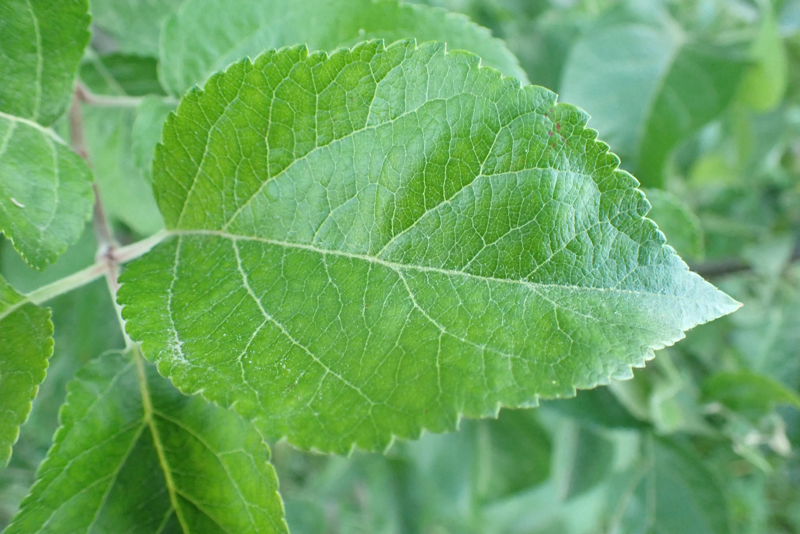

In [46]:
# Loading an image from the Validation/ Healthy directory
image_path = r"C:\Studies\6th sem\INFOSYS\dataset\archive\Validation\Validation\Healthy\9ce01ba1856fc6ad.jpg"
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Healthy Plant: \n')
resized_img

In [47]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = ['Healthy', 'Powdery', 'Rust']

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Predicted Class: Powdery

Confidence Score: 0.38832607865333557


In [50]:
model.save(r'C:\Studies\6th sem\INFOSYS\project\plant_disease_classifier.keras')